# Analysis of MSPA Survey

The MSPA Software Survey was collected in December 2016, with the aim for defining the future direction of the graduate program.

## Data preparation 

In [1]:
# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import os
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
%matplotlib notebook 

In [2]:
# read in comma-delimited text file, creating a pandas DataFrame object
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

In [3]:
# use the RespondentID as index for the rows, descending order (drop = True)
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)
valid_survey_input.head()

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [4]:
print('\nContents of initial survey data ---------------')
# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 
# show the column/variable names of the DataFrame (Note: RespondentID is no longer present)
print('\nColumn Names =', valid_survey_input.columns)


Contents of initial survey data ---------------

Number of Respondents = 207

Column Names = Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [5]:
# Data types
valid_survey_input.dtypes

Personal_JavaScalaSpark               int64
Personal_JavaScriptHTMLCSS            int64
Personal_Python                       int64
Personal_R                            int64
Personal_SAS                          int64
Professional_JavaScalaSpark           int64
Professional_JavaScriptHTMLCSS        int64
Professional_Python                   int64
Professional_R                        int64
Professional_SAS                      int64
Industry_JavaScalaSpark               int64
Industry_JavaScriptHTMLCSS            int64
Industry_Python                       int64
Industry_R                            int64
Industry_SAS                          int64
Python_Course_Interest              float64
Foundations_DE_Course_Interest      float64
Analytics_App_Course_Interest       float64
Systems_Analysis_Course_Interest    float64
Courses_Completed                   float64
PREDICT400                           object
PREDICT401                           object
PREDICT410                      

In [6]:
# shorten the variable/column names for software preference variables, and save it to new df
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

In [7]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:,"My_Java":"Ind_SAS"]

In [8]:
# Identify incomplete rows  by counting each column has how many row with information in it
software_df.count()

My_Java        207
My_JS          207
My_Python      207
My_R           207
My_SAS         207
Prof_Java      207
Prof_JS        207
Prof_Python    207
Prof_R         207
Prof_SAS       207
Ind_Java       207
Ind_JS         207
Ind_Python     207
Ind_R          207
Ind_SAS        207
dtype: int64

In [9]:
# define subset DataFrame for analysis courese preferences 
courese_df = survey_df.loc[:,"Python_Course_Interest":"Systems_Analysis_Course_Interest"]

In [10]:
# Identify incomplete rows  by counting each column has how many row with information in it
courese_df.count()

Python_Course_Interest              206
Foundations_DE_Course_Interest      200
Analytics_App_Course_Interest       203
Systems_Analysis_Course_Interest    200
dtype: int64

In [11]:
# show NA
courese_df[courese_df.isna().any(axis=1)]

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
RespondentID,,,,
5128110446,35.0,NaN,90.0,10.0
5125871009,5.0,NaN,15.0,20.0
5124494137,60.0,30.0,10.0,NaN
5124324047,70.0,20.0,0.0,NaN
5123712353,NaN,NaN,NaN,NaN
5123212204,100.0,NaN,20.0,NaN
5119974763,75.0,75.0,99.0,NaN
5114369319,100.0,100.0,NaN,35.0
5113285140,50.0,NaN,NaN,NaN


In [12]:
courese_df = courese_df.dropna(how="any")
courese_df.count()

Python_Course_Interest              196
Foundations_DE_Course_Interest      196
Analytics_App_Course_Interest       196
Systems_Analysis_Course_Interest    196
dtype: int64

In [13]:
# define subset DataFrame for analysis of courses students have been completed
completed_df = survey_df.loc[:,'Courses_Completed':'Other']

In [14]:
# Identify incomplete rows  
completed_df['Courses_Completed'].count()

187

In [15]:
completed_df.count()

Courses_Completed    187
PREDICT400           163
PREDICT401           171
PREDICT410           145
PREDICT411           113
PREDICT413            59
PREDICT420           127
PREDICT422            48
PREDICT450            17
PREDICT451             7
PREDICT452            13
PREDICT453            11
PREDICT454             5
PREDICT455            30
PREDICT456             6
PREDICT457             4
OtherPython            5
OtherR                14
OtherSAS               2
Other                 26
dtype: int64

In [16]:
completed_df = completed_df.dropna(subset=['Courses_Completed'])

## Data exploration

In [17]:
# descriptive statistics for software preference
software_df.describe()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000


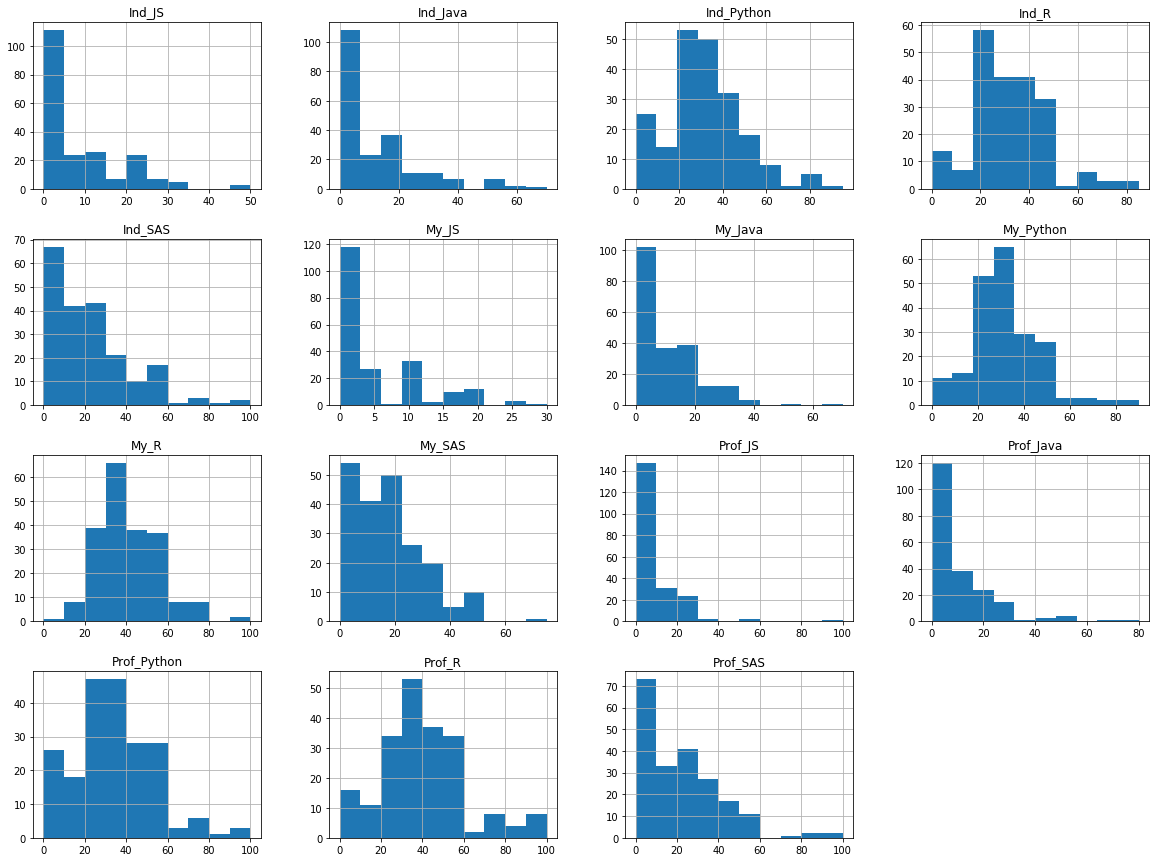

In [18]:
# vote distribution ???? how to fix X axis
num_bins = 10
software_df.hist(bins=num_bins, figsize=(20,15))
# plt.savefig("hr_histogram_plots")
plt.show()

In [19]:
courese_df.describe()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
count,196.000000,196.000000,196.000000,196.000000
mean,74.392857,58.081633,55.668367,54.091837
std,29.617108,32.585406,33.922797,33.619465
min,0.000000,0.000000,0.000000,0.000000
25%,60.000000,29.500000,25.000000,24.250000
50%,85.000000,60.000000,60.000000,53.000000
75%,100.000000,89.250000,85.000000,81.250000
max,100.000000,100.000000,100.000000,100.000000


In [20]:
completed_df.describe()

,Courses_Completed
count,187.000000
mean,6.342246
std,3.170849
min,1.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,12.000000


## Data visualization

### software preference

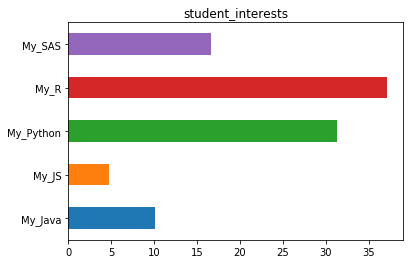

In [21]:
software_df.loc[:,"My_Java":"My_SAS"].mean().plot(kind='barh')
plt.title("student_interests")
plt.savefig("Output/student_interests.png") 
plt.show()

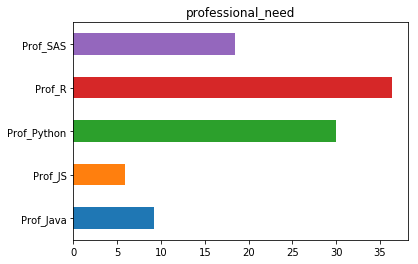

In [22]:
software_df.loc[:,"Prof_Java":"Prof_SAS"].mean().plot(kind='barh')
plt.title("professional_need")
plt.savefig("Output/professional_nee.png") 
plt.show()

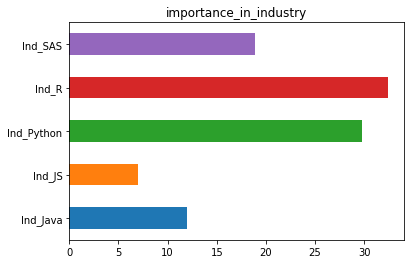

In [23]:
software_df.loc[:,"Ind_Java":"Ind_SAS"].mean().plot(kind='barh')
plt.title("importance_in_industry")
plt.savefig("Output/importance_in_industry.png") 
plt.show()

In [24]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 432x288 with 0 Axes>

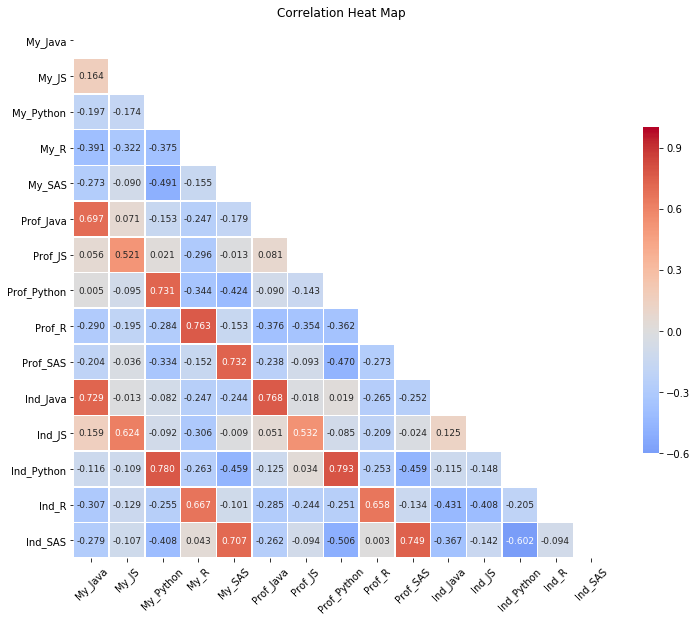

In [25]:
corr_chart(df_corr = software_df) 

### student interest in potential new courses

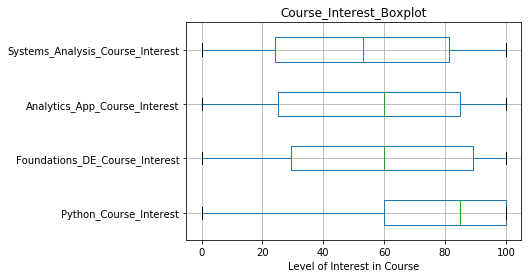

<Figure size 432x288 with 0 Axes>

In [26]:
# generate a boxplot for course interests
fig, axis = plt.subplots()
courese_df.boxplot(ax=axis, bootstrap=5000,vert=False)
axis.set_xlabel('Level of Interest in Course')
plt.title("Course_Interest_Boxplot")
plt.show()

# save file
plt.savefig("Output/Course_Interest_Boxplot.png") 

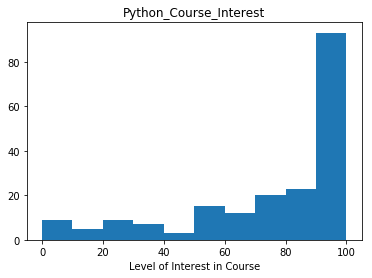

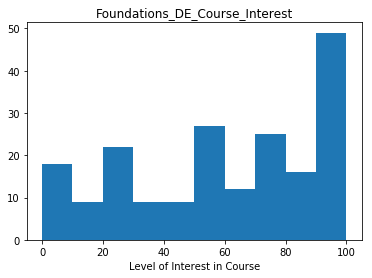

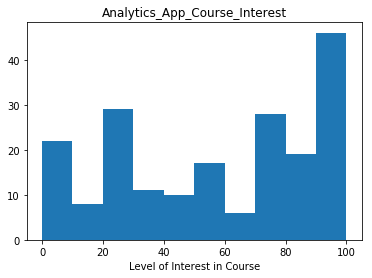

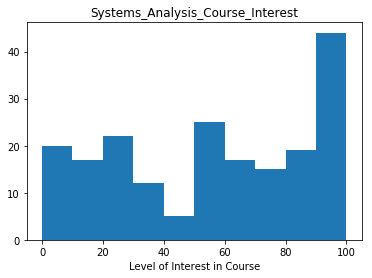

In [27]:
for i in range(4):
    file_title = courese_df.columns[i] + ' histogram'
    plot_title = courese_df.columns[i]
    fig, axis = plt.subplots()
    axis.set_xlabel('Level of Interest in Course')
    plt.title(plot_title)
    hist_plot = axis.hist(courese_df[courese_df.columns[i]], bins=10)
    output_path = "Output/" + file_title + ".png"
    plt.savefig(output_path, bbox_inches = 'tight', dpi=None, pad_inches=0.25, frameon=None)  

In [28]:
### Course completed
completed_count = completed_df.count()
completed_count

Courses_Completed    187
PREDICT400           147
PREDICT401           155
PREDICT410           132
PREDICT411           104
PREDICT413            56
PREDICT420           115
PREDICT422            43
PREDICT450            16
PREDICT451             7
PREDICT452            13
PREDICT453             9
PREDICT454             4
PREDICT455            27
PREDICT456             5
PREDICT457             4
OtherPython            5
OtherR                14
OtherSAS               2
Other                 23
dtype: int64

## Data scaling and comparisons

In [29]:
# transformations using Scikit Learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


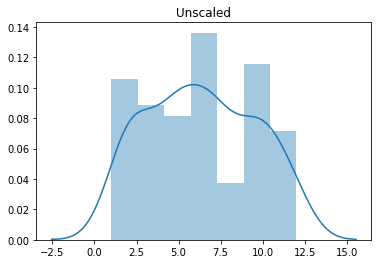

In [30]:
# select"Courses_Completed" as a variable to examine the effect of transformations
# documentation at http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
    
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

X = completed_df[['Courses_Completed']]

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Output/Transformation-Unscaled.png', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


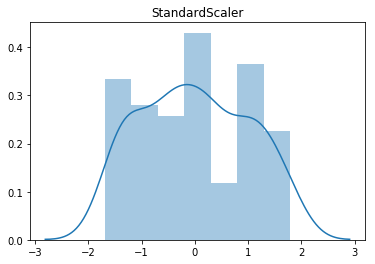

In [31]:
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')
standard_fig.savefig('Output/Transformation-StandardScaler.png', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


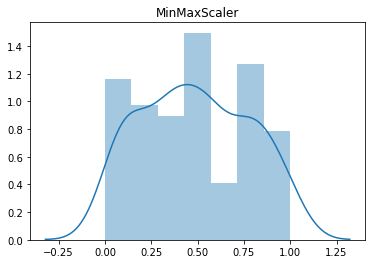

In [32]:
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
minmax_fig.savefig('Output/Transformation-MinMaxScaler.png', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

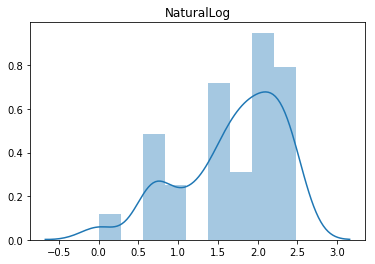

In [33]:
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Output/Transformation-NaturalLog.png', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  